<a href="https://colab.research.google.com/github/Palash-73/Afame-Technologies/blob/main/Afame_Internship_Project_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving Sales.csv to Sales.csv


In [2]:
data = pd.read_csv(io.BytesIO(uploaded['Sales.csv']))
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.shape

(200, 4)

In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# Correlation Matrix
cor = data.corr().round(2)
cor

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.90
Radio,0.05,1.00,0.35,0.35
Newspaper,0.06,0.35,1.00,0.16
Sales,0.90,0.35,0.16,1.00


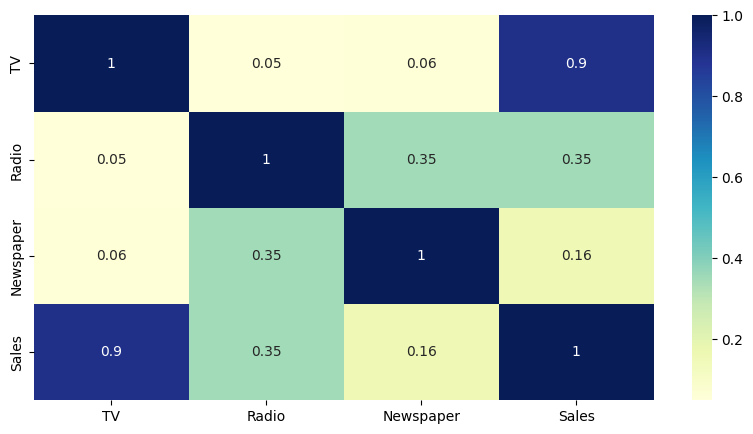

In [9]:
# Correlation matrix visualization for better understanding

plt.figure(figsize=(10,5))
sns.heatmap(cor,cmap='YlGnBu',annot=True)
plt.show()

In [10]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
# Splitting data in to X and Y

X = data.loc[:,['TV', 'Radio', 'Newspaper']]
Y = data['Sales']

In [12]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
Y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [14]:
# Fitting a linear model
import statsmodels.api as sm
X = sm.add_constant(X)

In [15]:
X.head()

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size=0.2, random_state=45)

In [17]:
X_train.shape

(160, 4)

In [18]:
X_test.shape

(40, 4)

In [19]:
Y_train.shape

(160,)

In [20]:
#performing the regression
#OLS = Ordinary Least Square
model = sm.OLS(Y_train,X_train).fit()

In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     528.4
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           1.80e-81
Time:                        06:53:05   Log-Likelihood:                -304.95
No. Observations:                 160   AIC:                             617.9
Df Residuals:                     156   BIC:                             630.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5428      0.329     13.796      0.0

In [22]:
from statsmodels.tools.eval_measures import rmse

# now generate predictions
ypred_train = model.predict(X_train)

# calc rmse
rmse_train = rmse(Y_train, ypred_train)
rmse_train

1.6274153362919814

In [23]:
#mae = Mean absolute error
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

print(mae(Y_train, ypred_train))

1.2149916725246315


In [24]:
# now generate predictions on test data
ypred_test = model.predict(X_test)

# calc rmse
rmse_test = rmse(Y_test, ypred_test.round(1))
rmse_test



#Training acc >> Test Acc ------------> Overfit
#Training acc ~ Test acc -------------> Best fit
# Train and test both acc are low ----> Underfit

1.7343586710943037

In [25]:
# concat actual values with predicted values

Y_actual_vs_predicted = pd.concat([Y_train, ypred_train], axis=1)
Y_actual_vs_predicted.columns = ['actual_price','predicted_price']
Y_actual_vs_predicted.head()

# If need to download
# Y_actual_vs_predicted.to_csv('Y_actual_vs_predicted.csv')
# files.download('Y_actual_vs_predicted.csv')

,actual_price,predicted_price
97,20.5,17.045045
174,16.5,17.266638
138,9.6,9.664212
67,13.4,13.845798
175,27.0,25.120910


In [26]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [27]:
single_observation = pd.DataFrame({'const':[1],'TV':[200], 'Radio':[37], 'Newspaper':[70],})

In [28]:
prediction = model.predict(single_observation)
print(prediction)

0    19.417446
dtype: float64


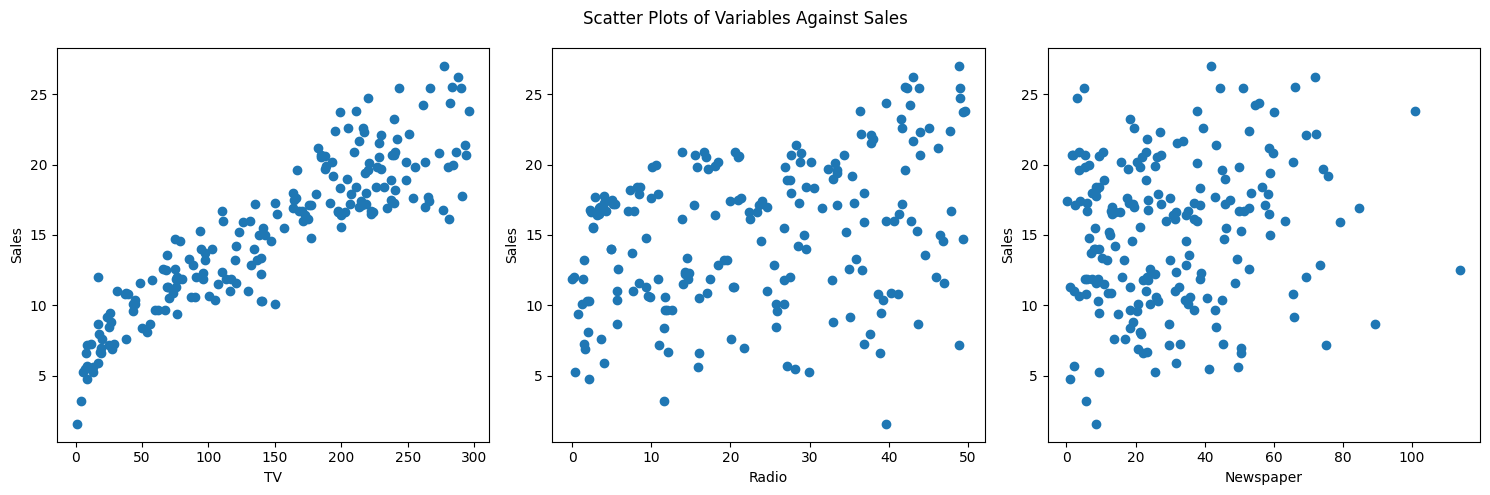

In [29]:
# Create a new figure and set of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust figsize as needed

# Scatter plot for variable1 against sales
axes[0].scatter(data['TV'], data['Sales'])
axes[0].set_xlabel('TV')
axes[0].set_ylabel('Sales')

# Scatter plot for variable2 against sales
axes[1].scatter(data['Radio'], data['Sales'])
axes[1].set_xlabel('Radio')
axes[1].set_ylabel('Sales')

# Scatter plot for variable3 against sales
axes[2].scatter(data['Newspaper'], data['Sales'])
axes[2].set_xlabel('Newspaper')
axes[2].set_ylabel('Sales')

# Add a title to the entire plot
plt.suptitle('Scatter Plots of Variables Against Sales')

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()


In [30]:
# This shows that advertisement on TV is more efficient then other platforms

In [31]:
# Creating a copy of data for feature engineering

data_copy = data
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [32]:
# Doing feature engineering to create new variables to find any linear relation

from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_copy[['Radio', 'Newspaper']])

# Convert polynomial features array into a DataFrame
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Radio', 'Newspaper']))

# Concatenate the original DataFrame with the polynomial features DataFrame
df = pd.concat([data_copy, poly_df], axis=1)


In [33]:
df.head()

,TV,Radio,Newspaper,Sales,Radio,Newspaper,Radio^2,Radio Newspaper,Newspaper^2
0,230.1,37.8,69.2,22.1,37.8,69.2,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,10.4,39.3,45.1,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,12.0,45.9,69.3,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,16.5,41.3,58.5,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,17.9,10.8,58.4,116.64,630.72,3410.56


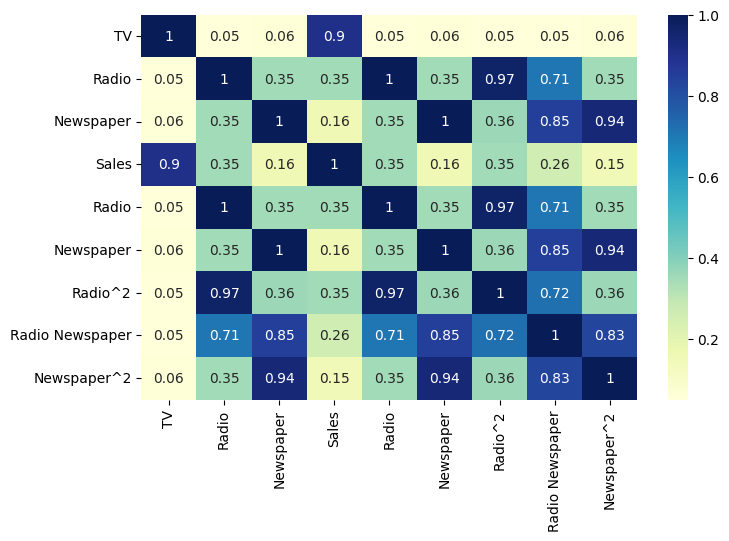

In [34]:
cor1 = df.corr().round(2)
plt.figure(figsize=(8,5))
sns.heatmap(cor1,cmap='YlGnBu',annot=True)
plt.show()

In [34]:
# Unable to find any imporvement in the correlation

In [56]:
# Creating a simple calculator type interface for prediction
import tkinter as tk
from tkinter import messagebox
import numpy as np
import ipywidgets as widgets
from IPython.display import display


# Dummy function to mimic a predictive model
def make_prediction(var1, var2, var3):
    # Replace this with your actual model prediction logic
    prediction_app =  model.predict(pd.DataFrame({'const':[1],'TV':[var1], 'Radio':[var2], 'Newspaper':[var3],}))
    return prediction_app


def predict(var1, var2, var3):
    try:
        var1 = float(var1)
        var2 = float(var2)
        var3 = float(var3)
        prediction = make_prediction(var1, var2, var3)
        result_label.value = f"Prediction: {prediction[0].round(2)}"
    except ValueError:
        result_label.value = "Error: Please enter valid numbers for all variables."

# Create input widgets for variables
var1_input = widgets.FloatText(description="TV:")
var2_input = widgets.FloatText(description="Radio:")
var3_input = widgets.FloatText(description="Newspaper:")

# Create a button to trigger the prediction
predict_button = widgets.Button(description="Prediction")
predict_button.on_click(lambda _: predict(var1_input.value, var2_input.value, var3_input.value))

# Create a label to display the prediction result
result_label = widgets.Label()

# Arrange the widgets in a layout
input_widgets = widgets.VBox([var1_input, var2_input, var3_input])
output_widgets = widgets.VBox([predict_button, result_label])
layout = widgets.HBox([input_widgets, output_widgets])

# Display the layout
display(layout)
